### Approach:
1. Centre the data around mean (subtract mean from data points)
2. Calculate covariance matrix
3. Calculate eigen vectors
4. Sort eigen values in descending order and select top k eigen vectors
5. Project data points on the eigen vectors (dot product)

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


In [25]:
data = pd.read_csv("../data/Iris.csv")

In [71]:
class PCA :
    def __init__(self,
                k : int):
        
        self.components = k
        
    def fit(self,X):
        # Standardize along mean
        self.mean = np.mean(X, axis = 0)
        X = X -self.mean
        
        # Calculate the covariance matrix.
        # np.cov expects each row of m represents a variable, and each column a single observation of all those variables.
        cov = np.cov(X.T)
        
        # Calculate the eigen values and eigen vectors
        eigen_values, eigen_vectors = np.linalg.eig(cov)
        eigen_vectors = eigen_vectors.T ## We take transpose here since each col is a eigen vector
        
        # Sort by eigen values
        idxs = np.argsort(eigenvalues)[::-1]
        eigen_vectors = eigen_vectors[idxs]
        eigen_values = eigen_values[idxs]
        
        # Select top k eigen vectors as PCs
        self.components = eigen_vectors[0:self.components]
        
        

    def transform(self,X):
        
        # Standardise the matrix
        X = X - self.mean
        
        # Project the data points on PC. 
        # We take transpose here since we want components stacked as cols to get the projection.
        return np.dot(X, self.components.T)
        

In [78]:
y_encoded = le.fit_transform(y)
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)


Shape of X: (150, 5)
Shape of transformed X: (150, 2)


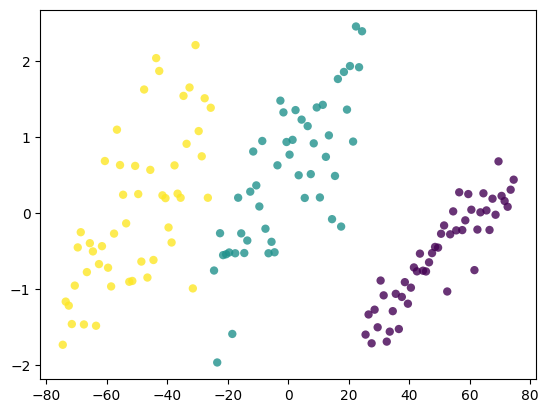

In [79]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1,x2 , c = y_encoded, edgecolor = "none", alpha = 0.8,cmap='viridis')

In [46]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [49]:
X = X- np.mean(X, axis = 0)

In [48]:
X = X.drop(columns = ['Id'])

In [51]:
cov = np.cov(X.T)


In [52]:
cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [31]:
print(cov)

[[ 1.88750000e+03  2.57828859e+01 -7.49228188e+00  6.76677852e+01
   2.98322148e+01]
 [ 2.57828859e+01  6.85693512e-01 -3.92684564e-02  1.27368233e+00
   5.16903803e-01]
 [-7.49228188e+00 -3.92684564e-02  1.88004027e-01 -3.21712752e-01
  -1.17981208e-01]
 [ 6.76677852e+01  1.27368233e+00 -3.21712752e-01  3.11317942e+00
   1.29638747e+00]
 [ 2.98322148e+01  5.16903803e-01 -1.17981208e-01  1.29638747e+00
   5.82414318e-01]]


In [53]:
cov_df = pd.DataFrame(cov, index = X.columns, columns= X.columns)

In [54]:
cov_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


<Axes: >

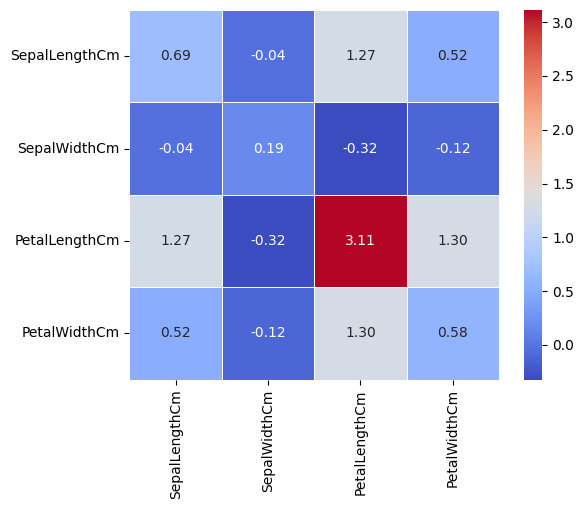

In [55]:

sns.heatmap(cov_df, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

In [56]:

eigenvalues, eigenvectors = np.linalg.eig(cov)

In [57]:
eigenvalues

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
## if your data has shape (n_features, n_samples), (4,150)
## then cov is of shape (n_features, n_features), and eigenvectors is of shape (n_features, n_features). (4,4)

In [63]:
X.shape

(150, 4)

In [ ]:
# Each column eigenvectors[:, i] corresponds to the eigenvector for eigenvalues[i]

In [58]:
eigenvectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [64]:
eigenvalues

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [62]:
eigenvectors[0]

array([ 0.36158968, -0.65653988, -0.58099728,  0.31725455])

In [61]:
eigenvectors.T[0]

array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])